## A simple simulation procedure for producing gradient-echo imaging k-space data

### Loading julia packages

In [1]:
push!(LOAD_PATH,"library");
addprocs(Sys.CPU_CORES-nprocs());
using myFun
using PyPlot
nprocs()

8

### We will acquire 2D gradient-echo imaging data from a phantom, comprising 3 compartments:
![phantom](phantoms/phantom.jpg)


### We need to specify the following physical properties: 
* $T_2^*$ value for M1
* $T_2^*$ value for M2
* $T_2^*$ value for M3
* Frequency offset value (i.e., chemical shift: $\Delta \omega$ in Hz) for M2
* Frequency offset value (i.e., chemical shift: $\Delta \omega$ in Hz) for M3

In [2]:
msec = 1e-3
T2valueForM1 = Float64(80msec) # 80 msec
T2valueForM2 = Float64(40msec) # 40 msec
T2valueForM3 = Float64(150msec) # 150 msec
FrequencyOffsetForM2 = Float64(1200.) # Hz
FrequencyOffsetForM3 = Float64(-800.); # Hz

### We also need to choose the following MRI scan parameters:
* Field of view (FOV) of imaging
* Dwell time (DW) of k-space data sampling
* Echo time (TE)
* Acquisition matrix size 
* Noise intensity (arbitrary unit)

**TR** is assumed to be significantly larger than T1 in this very simple simulation that does not consider T1 effect

In [3]:
μsec =1e-6
FOV = Float64(220.) # in mm
DW = Float64(50μsec) # between 5μsec and 100μsec
matrixSizeX = Int64(96) # should be integer
matrixSizeY = Int64(96) # should be integer
TE = Float64(50msec) # 50 msec: The minimal value allowed is about 10 msec.
NoiseLevel = Float64(2000.); # arbitrary unit

### Data Acquisition and image reconstruction

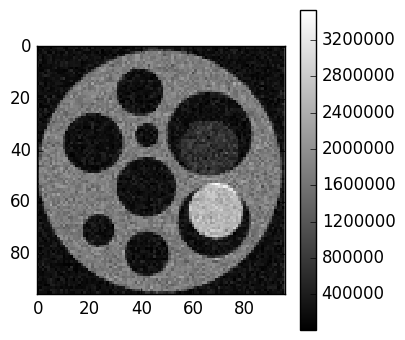

  3.904796 seconds (147.79 k allocations: 8.973 MiB)


In [7]:
# this may take 1 min to run
@time kSpaceData1 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyOffsetForM2,FrequencyOffsetForM3,FOV,DW,matrixSizeX,matrixSizeY,TE,NoiseLevel);
data1 = fftshift(fft(fftshift(kSpaceData1)));
figure(figsize=(4,4));imshow(abs.(data1),cmap="gray", interpolation="none");colorbar();

### We will acquire another set of data with different TE value

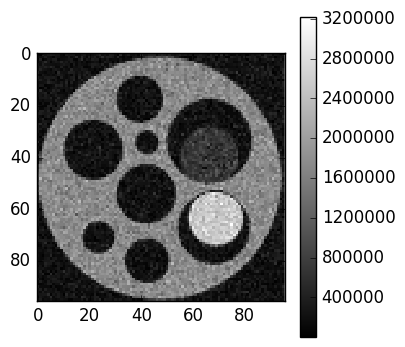

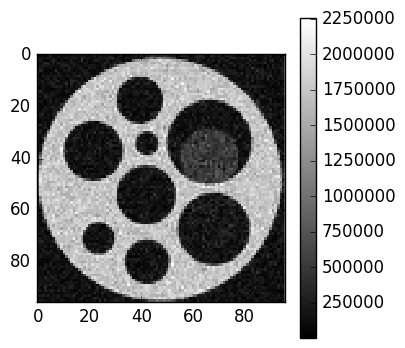

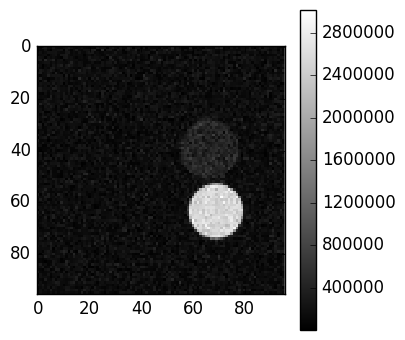

  3.904683 seconds (229.53 k allocations: 12.653 MiB)


In [5]:
# this may take 1 min to run
NewTE = TE + (0.5/FrequencyOffsetForM3);
@time kSpaceData2 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyOffsetForM2,FrequencyOffsetForM3,FOV,DW,matrixSizeX,matrixSizeY,NewTE,NoiseLevel);
data2 = fftshift(fft(fftshift(kSpaceData2)));
figure(1,figsize=(4,4));imshow(abs.(data2),cmap="gray", interpolation="none"); colorbar()
figure(2,figsize=(4,4));imshow(abs.(data1+data2)/2.,cmap="gray", interpolation="none"); colorbar()
figure(3,figsize=(4,4));imshow(abs.(data1-data2)/2.,cmap="gray", interpolation="none"); colorbar();

### Homework
* You may choose different phantom properties
* You may try different FOV, TE values, matrix size, noise level
* You may produce more images and average them to increase the signal to noise ratio
* You may produce multi-TE images for T2 mapping
* You may zero fill any part of the k-space and see the impact on reconstructed images (e.g., $k_y$ lines 1 to 30; or odd $k_y$ lines)
* You may look into __chemical shift effect__
* You may find a way to produce images with only signals from M2
